## Prediction using Supervised ML (Level - Beginner)
## by
## Aniket Bansal 
### Task 1 


Importing all the relavant libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step-1 :Importing data 

In [20]:
# First step is to import the data 
given_data = "http://bit.ly/w-data"
data_fr = pd.read_csv(given_data)
print("Data has now been imported and looks like")
data_fr 

Data has now been imported and looks like


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Getting some basic insights of data 

In [41]:
data_fr.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
data_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
data_fr.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
data_fr.tail(3)

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


<function matplotlib.pyplot.show(close=None, block=None)>

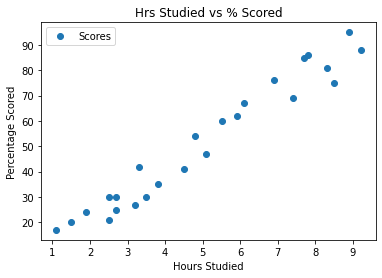

In [25]:
#plotting the graph to get the relationship of hours studied and % scored
data_fr.plot(x="Hours",y="Scores",style="o")
plt.title("Hrs Studied vs % Scored")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show

We can confidently say that there is a positive correlation between the number of hours studied by a student and the Percentage marks obtained by him 
Now we will divide our data into attributes and labels

In [26]:
att = data_fr.iloc[:,:1].values
#att represents the array of values in "Hours" coloumn of the data 
lab = data_fr.iloc[:,1].values
#lab represents the array of values in "Scores" Coloumn of tha data 
print(att)
print(lab)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now splitting the data into train and test sets

In [27]:
#Using train_test_split() method of scikit-Learn Library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(att,lab,test_size=0.25,random_state=0)
#We have chosen 25% of our data for testing purpose and remaining 75% will be used for training purpose

In [46]:
#Now , Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print("")

### Our model has now been trained 


Coming to the Regression Line

<function matplotlib.pyplot.show(close=None, block=None)>

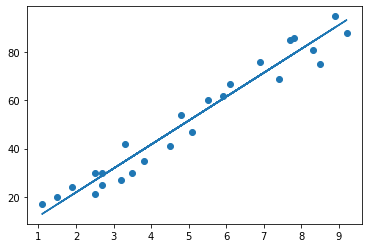

In [42]:
line = model.coef_*att+model.intercept_
#plotting the test data and regression line 
plt.scatter(att,lab)
plt.plot(att,line)
plt.show

In [30]:
print("Intercept:" , model.intercept_)

Intercept: 1.932204253151646


In [31]:
print("Coefficient:",model.coef_)

Coefficient: [9.94167834]


In [32]:
#predicting through our trained algorithm
print(x_test)
#testing data in hours
predicted_values = model.predict(x_test)
print(predicted_values)
#here we have predicted the scores of testing data of hours on the basis of our trained model

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]
[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


#### We must compare the actual values with our predicted values 

In [33]:
data_fr2 = pd.DataFrame({"Actual":y_test,"Predicted":predicted_values})
data_fr2

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Ques - What will be the predicted score if a student studies for 9.25 hours/day

In [47]:
hrs= 9.25
prediction = model.predict([[hrs]])
print("Predicted Score in case of 9.25 hours studied is {} ".format([prediction[0]]))

Predicted Score in case of 9.25 hours studied is [93.89272889341655] 


In [35]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,predicted_values))

Mean Absolute Error: 4.130879918502486


In [36]:
accuracy = model.score(x_test,y_test)
print(accuracy*100,"%")

93.67661043365055 %


In [39]:
print(np.mean((predicted_values-y_test)**2))

20.33292367497997
